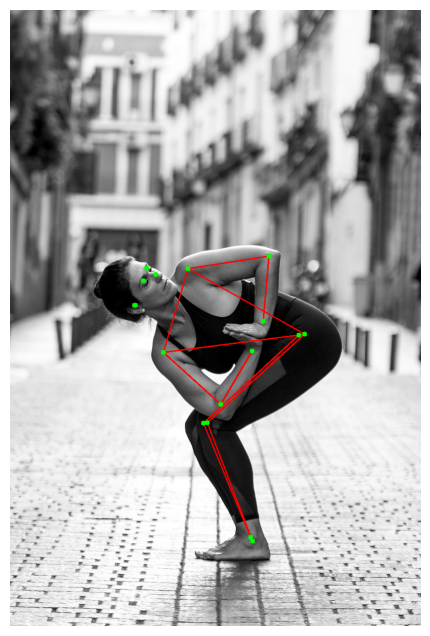


🔹 **POSE FEEDBACK** 🔹
➡ ⚠ Straighten Left Leg (Angle: 111.6°)
➡ ⚠ Straighten Right Leg (Angle: 110.2°)

🔹 **ANGLE DATA** 🔹
📏 Left Arm: 76.1°
📏 Right Arm: 78.1°
📏 Left Leg: 111.6°
📏 Right Leg: 110.2°


In [16]:
import cv2
import torch
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms
from torchvision.models.detection import keypointrcnn_resnet50_fpn

# Load the pre-trained Keypoint R-CNN model
model = keypointrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Define keypoint connections based on COCO dataset format
COCO_PERSON_SKELETON = [
    (5, 7), (7, 9),    # Left Arm
    (6, 8), (8, 10),   # Right Arm
    (5, 6),            # Shoulders
    (11, 13), (13, 15),# Left Leg
    (12, 14), (14, 16),# Right Leg
    (11, 12),          # Hips
    (5, 11), (6, 12)   # Torso
]

# Function to calculate angles between three points
def calculate_angle(a, b, c):
    a, b, c = np.array(a), np.array(b), np.array(c)
    ba, bc = a - b, c - b
    cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
    return np.degrees(np.arccos(np.clip(cosine_angle, -1.0, 1.0)))

# Function to analyze pose and provide feedback
def analyze_pose(keypoints):
    feedback_list = []
    angle_data = {}
    joints = {
        "Left Arm": (keypoints[5], keypoints[7], keypoints[9]),
        "Right Arm": (keypoints[6], keypoints[8], keypoints[10]),
        "Left Leg": (keypoints[11], keypoints[13], keypoints[15]),
        "Right Leg": (keypoints[12], keypoints[14], keypoints[16])
    }
    
    for limb, (a, b, c) in joints.items():
        angle = calculate_angle(a[:2], b[:2], c[:2])
        angle_data[limb] = angle  # Store angles for display

        if limb in ["Left Arm", "Right Arm"] and not (45 <= angle <= 135):
            feedback_list.append(f"⚠ Adjust {limb} (Angle: {angle:.1f}°)")
        if limb in ["Left Leg", "Right Leg"] and angle < 140:
            feedback_list.append(f"⚠ Straighten {limb} (Angle: {angle:.1f}°)")

    if not feedback_list:
        return ["✅ Perfect Pose!"], angle_data  # If no corrections needed

    return feedback_list, angle_data

# Function to load and process image
def load_image(image_path):
    img = cv2.imread(image_path)
    if img is None:
        raise FileNotFoundError(f"Error: Could not load image at {image_path}")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    transform = transforms.Compose([transforms.ToTensor()])
    return img, transform(img).to(device)

# Load and analyze image
image_path = r"C:\Users\ASUS\Desktop\projeccct\HumanPoseEstimation\images\pose1.jpg"# Replace with actual path
img, img_tensor = load_image(image_path)

# Perform pose estimation
with torch.no_grad():
    output = model([img_tensor])

# Extract keypoints
keypoints = output[0]['keypoints'][0].cpu().numpy()
feedback, angles = analyze_pose(keypoints)

# Draw keypoints and skeleton on image (WITHOUT FEEDBACK TEXT)
for partA, partB in COCO_PERSON_SKELETON:
    if keypoints[partA][2] > 0.5 and keypoints[partB][2] > 0.5:
        cv2.line(img, tuple(map(int, keypoints[partA][:2])), tuple(map(int, keypoints[partB][:2])), (255, 0, 0), 2)

for x, y, conf in keypoints:
    if conf > 0.5:
        cv2.circle(img, (int(x), int(y)), 5, (0, 255, 0), -1)

# Show result without text feedback
plt.figure(figsize=(8, 8))
plt.imshow(img)
plt.axis("off") 
plt.show()

# Print feedback in the console
print("\n🔹 **POSE FEEDBACK** 🔹")
for msg in feedback:
    print(f"➡ {msg}")

# Print angles for better understanding
print("\n🔹 **ANGLE DATA** 🔹")
for limb, angle in angles.items():
    print(f"📏 {limb}: {angle:.1f}°")


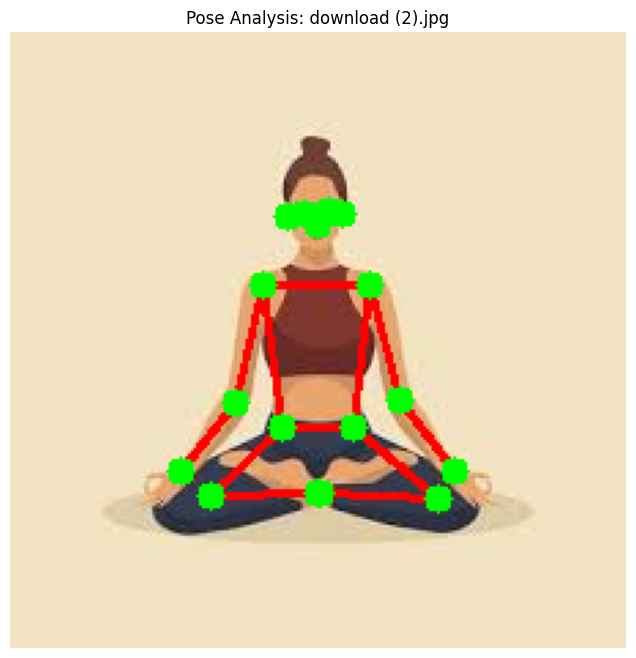


🔹 **POSE FEEDBACK for download (2).jpg** 🔹
➡ ⚠ Adjust Left Arm (Angle: 156.5°)
➡ ⚠ Adjust Right Arm (Angle: 155.1°)
➡ ⚠ Straighten Left Leg (Angle: 36.7°)
➡ ⚠ Straighten Right Leg (Angle: 41.5°)

🔹 **ANGLE DATA** 🔹
📏 Left Arm: 156.5°
📏 Right Arm: 155.1°
📏 Left Leg: 36.7°
📏 Right Leg: 41.5°

--------------------------------------------------



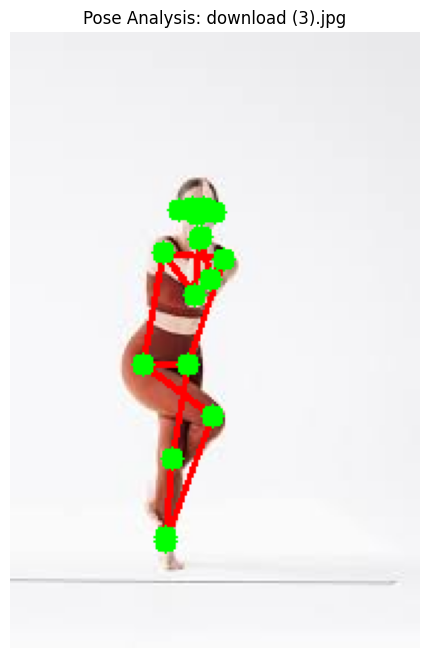


🔹 **POSE FEEDBACK for download (3).jpg** 🔹
➡ ⚠ Adjust Left Arm (Angle: 41.9°)
➡ ⚠ Adjust Right Arm (Angle: 39.8°)
➡ ⚠ Straighten Right Leg (Angle: 105.2°)

🔹 **ANGLE DATA** 🔹
📏 Left Arm: 41.9°
📏 Right Arm: 39.8°
📏 Left Leg: 175.1°
📏 Right Leg: 105.2°

--------------------------------------------------



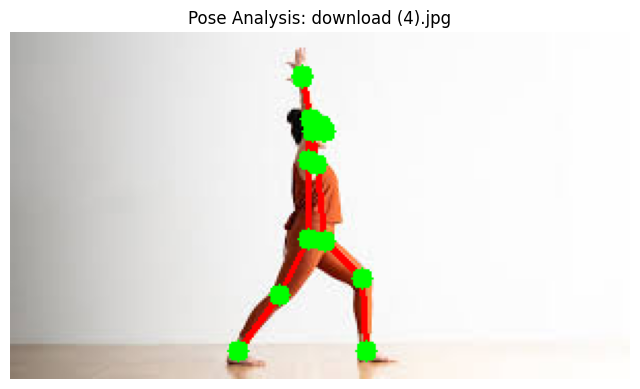


🔹 **POSE FEEDBACK for download (4).jpg** 🔹
➡ ⚠ Adjust Left Arm (Angle: 177.0°)
➡ ⚠ Adjust Right Arm (Angle: 164.7°)
➡ ⚠ Straighten Left Leg (Angle: 137.3°)

🔹 **ANGLE DATA** 🔹
📏 Left Arm: 177.0°
📏 Right Arm: 164.7°
📏 Left Leg: 137.3°
📏 Right Leg: 170.7°

--------------------------------------------------



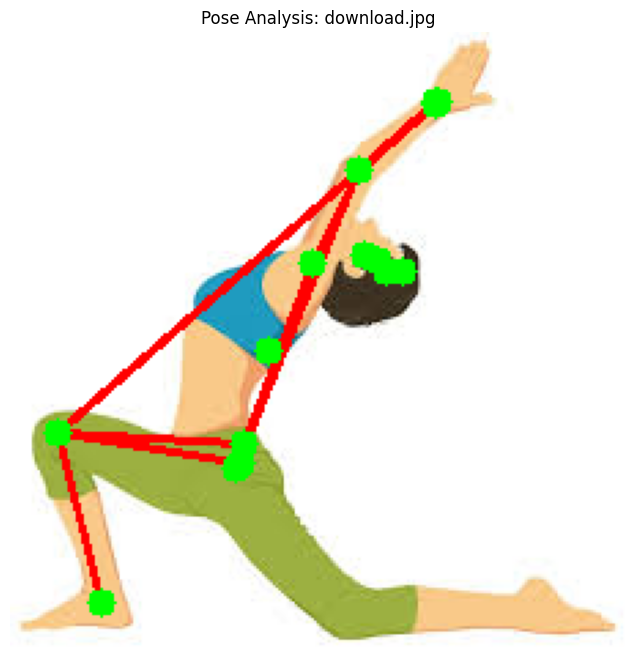


🔹 **POSE FEEDBACK for download.jpg** 🔹
➡ ⚠ Adjust Left Arm (Angle: 152.9°)
➡ ⚠ Adjust Right Arm (Angle: 157.0°)
➡ ⚠ Straighten Left Leg (Angle: 66.9°)
➡ ⚠ Straighten Right Leg (Angle: 44.5°)

🔹 **ANGLE DATA** 🔹
📏 Left Arm: 152.9°
📏 Right Arm: 157.0°
📏 Left Leg: 66.9°
📏 Right Leg: 44.5°

--------------------------------------------------



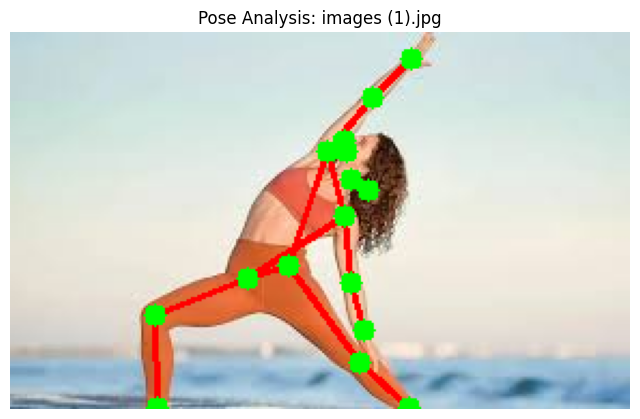


🔹 **POSE FEEDBACK for images (1).jpg** 🔹
➡ ⚠ Adjust Left Arm (Angle: 171.4°)
➡ ⚠ Adjust Right Arm (Angle: 174.7°)
➡ ⚠ Straighten Left Leg (Angle: 111.0°)

🔹 **ANGLE DATA** 🔹
📏 Left Arm: 171.4°
📏 Right Arm: 174.7°
📏 Left Leg: 111.0°
📏 Right Leg: 169.6°

--------------------------------------------------



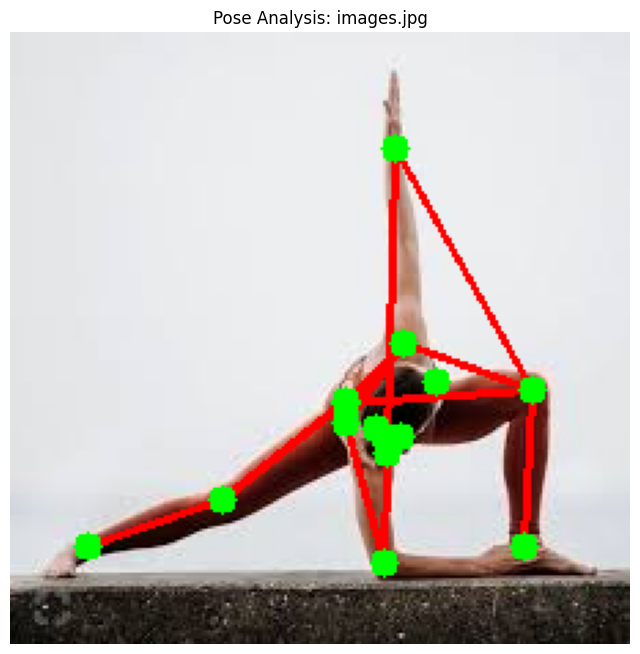


🔹 **POSE FEEDBACK for images.jpg** 🔹
➡ ⚠ Adjust Left Arm (Angle: 40.3°)
➡ ⚠ Adjust Right Arm (Angle: 16.6°)
➡ ⚠ Straighten Left Leg (Angle: 82.7°)

🔹 **ANGLE DATA** 🔹
📏 Left Arm: 40.3°
📏 Right Arm: 16.6°
📏 Left Leg: 82.7°
📏 Right Leg: 159.3°

--------------------------------------------------



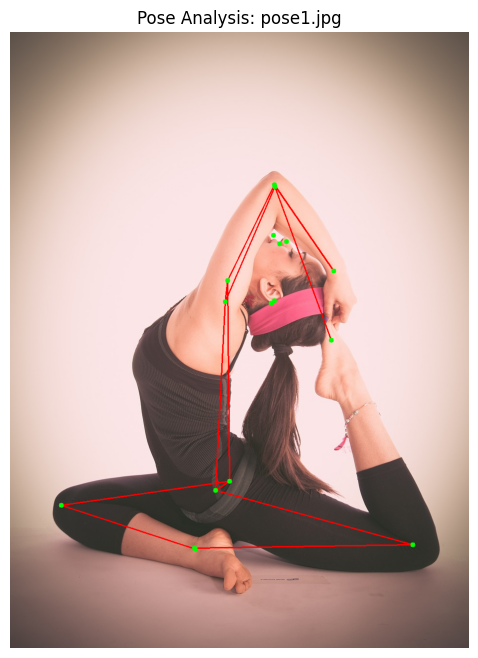


🔹 **POSE FEEDBACK for pose1.jpg** 🔹
➡ ⚠ Adjust Left Arm (Angle: 43.5°)
➡ ⚠ Straighten Left Leg (Angle: 16.3°)
➡ ⚠ Straighten Right Leg (Angle: 26.3°)

🔹 **ANGLE DATA** 🔹
📏 Left Arm: 43.5°
📏 Right Arm: 60.3°
📏 Left Leg: 16.3°
📏 Right Leg: 26.3°

--------------------------------------------------



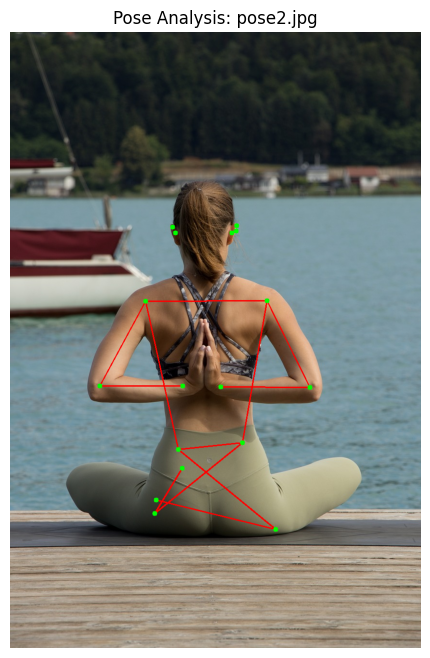


🔹 **POSE FEEDBACK for pose2.jpg** 🔹
➡ ⚠ Straighten Left Leg (Angle: 25.8°)
➡ ⚠ Straighten Right Leg (Angle: 19.9°)

🔹 **ANGLE DATA** 🔹
📏 Left Arm: 61.8°
📏 Right Arm: 63.2°
📏 Left Leg: 25.8°
📏 Right Leg: 19.9°

--------------------------------------------------



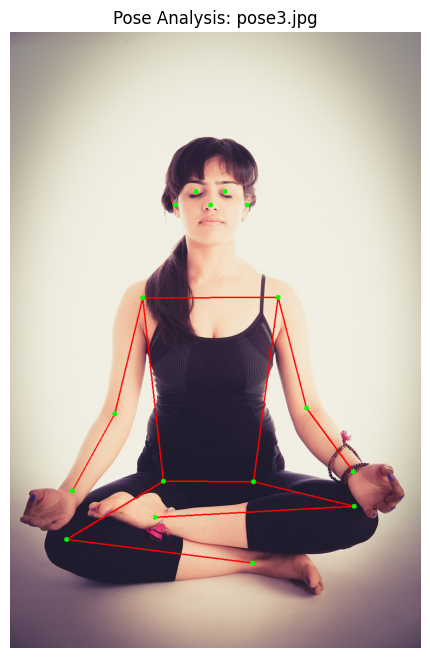


🔹 **POSE FEEDBACK for pose3.jpg** 🔹
➡ ⚠ Adjust Left Arm (Angle: 158.0°)
➡ ⚠ Adjust Right Arm (Angle: 165.0°)
➡ ⚠ Straighten Left Leg (Angle: 17.0°)
➡ ⚠ Straighten Right Leg (Angle: 38.5°)

🔹 **ANGLE DATA** 🔹
📏 Left Arm: 158.0°
📏 Right Arm: 165.0°
📏 Left Leg: 17.0°
📏 Right Leg: 38.5°

--------------------------------------------------



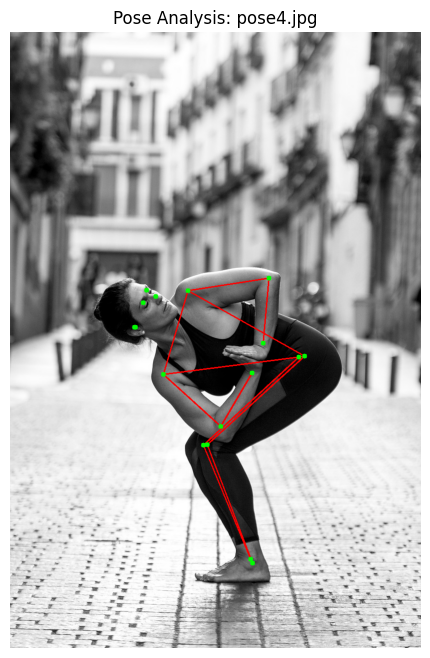


🔹 **POSE FEEDBACK for pose4.jpg** 🔹
➡ ⚠ Straighten Left Leg (Angle: 111.6°)
➡ ⚠ Straighten Right Leg (Angle: 110.2°)

🔹 **ANGLE DATA** 🔹
📏 Left Arm: 76.1°
📏 Right Arm: 78.1°
📏 Left Leg: 111.6°
📏 Right Leg: 110.2°

--------------------------------------------------



In [17]:
import cv2
import torch
import numpy as np
import matplotlib.pyplot as plt
import os
from torchvision import transforms
from torchvision.models.detection import keypointrcnn_resnet50_fpn

# Load the pre-trained Keypoint R-CNN model
model = keypointrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Define keypoint connections based on COCO dataset format
COCO_PERSON_SKELETON = [
    (5, 7), (7, 9),    # Left Arm
    (6, 8), (8, 10),   # Right Arm
    (5, 6),            # Shoulders
    (11, 13), (13, 15),# Left Leg
    (12, 14), (14, 16),# Right Leg
    (11, 12),          # Hips
    (5, 11), (6, 12)   # Torso
]

# Function to calculate angles between three points
def calculate_angle(a, b, c):
    a, b, c = np.array(a), np.array(b), np.array(c)
    ba, bc = a - b, c - b
    cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
    return np.degrees(np.arccos(np.clip(cosine_angle, -1.0, 1.0)))

# Function to analyze pose and provide feedback
def analyze_pose(keypoints):
    feedback_list = []
    angle_data = {}
    joints = {
        "Left Arm": (keypoints[5], keypoints[7], keypoints[9]),
        "Right Arm": (keypoints[6], keypoints[8], keypoints[10]),
        "Left Leg": (keypoints[11], keypoints[13], keypoints[15]),
        "Right Leg": (keypoints[12], keypoints[14], keypoints[16])
    }
    
    for limb, (a, b, c) in joints.items():
        angle = calculate_angle(a[:2], b[:2], c[:2])
        angle_data[limb] = angle  # Store angles for display

        if limb in ["Left Arm", "Right Arm"] and not (45 <= angle <= 135):
            feedback_list.append(f"⚠ Adjust {limb} (Angle: {angle:.1f}°)")
        if limb in ["Left Leg", "Right Leg"] and angle < 140:
            feedback_list.append(f"⚠ Straighten {limb} (Angle: {angle:.1f}°)")

    if not feedback_list:
        return ["✅ Perfect Pose!"], angle_data  # If no corrections needed

    return feedback_list, angle_data

# Function to load and process image
def load_image(image_path):
    img = cv2.imread(image_path)
    if img is None:
        raise FileNotFoundError(f"Error: Could not load image at {image_path}")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    transform = transforms.Compose([transforms.ToTensor()])
    return img, transform(img).to(device)

# Folder containing images (Change this path)
image_folder = r"C:\Users\ASUS\Desktop\projeccct\HumanPoseEstimation\images"  # Replace with your folder path
image_files = [os.path.join(image_folder, f) for f in os.listdir(image_folder) if f.endswith(('.jpg', '.png', '.jpeg'))]

# Process each image
for image_path in image_files:
    img, img_tensor = load_image(image_path)

    # Perform pose estimation
    with torch.no_grad():
        output = model([img_tensor])

    # Extract keypoints
    keypoints = output[0]['keypoints'][0].cpu().numpy()
    feedback, angles = analyze_pose(keypoints)

    # Draw keypoints and skeleton on image (WITHOUT FEEDBACK TEXT)
    for partA, partB in COCO_PERSON_SKELETON:
        if keypoints[partA][2] > 0.5 and keypoints[partB][2] > 0.5:
            cv2.line(img, tuple(map(int, keypoints[partA][:2])), tuple(map(int, keypoints[partB][:2])), (255, 0, 0), 2)

    for x, y, conf in keypoints:
        if conf > 0.5:
            cv2.circle(img, (int(x), int(y)), 5, (0, 255, 0), -1)

    # Show result for current image
    plt.figure(figsize=(8, 8))
    plt.imshow(img)
    plt.axis("off") 
    plt.title(f"Pose Analysis: {os.path.basename(image_path)}")
    plt.show()

    # Print feedback in the console
    print(f"\n🔹 **POSE FEEDBACK for {os.path.basename(image_path)}** 🔹")
    for msg in feedback:
        print(f"➡ {msg}")

    # Print angles for better understanding
    print("\n🔹 **ANGLE DATA** 🔹")
    for limb, angle in angles.items():
        print(f"📏 {limb}: {angle:.1f}°")
    
    print("\n" + "-"*50 + "\n")  # Separator for readability


Voice Feedback!!

C:\python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=KeypointRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=KeypointRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


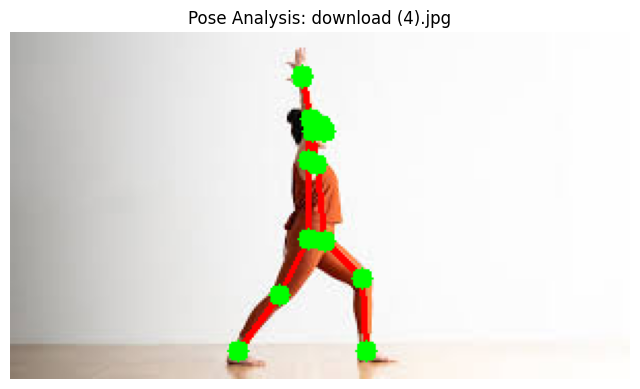


🔹 **POSE FEEDBACK for download (4).jpg** 🔹
➡ Lower your Left Arm slightly for better balance.
➡ Lower your Right Arm slightly for better balance.
➡ Straighten your Left Leg to improve flexibility and posture.

🔹 **ANGLE DATA** 🔹
📏 Left Arm: 177.0°
📏 Right Arm: 164.7°
📏 Left Leg: 137.3°
📏 Right Leg: 170.7°

--------------------------------------------------



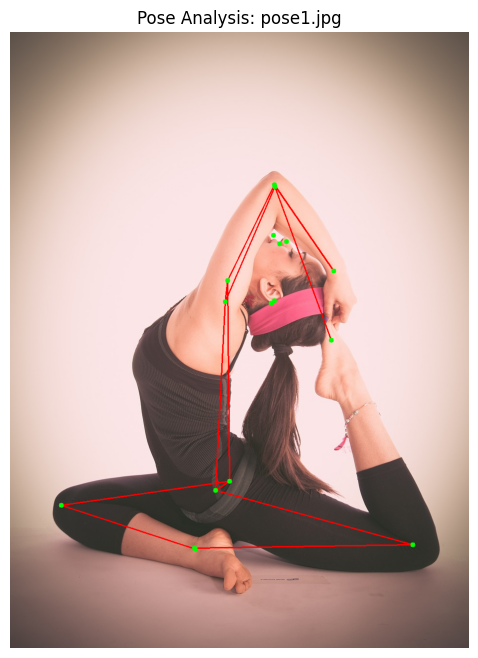


🔹 **POSE FEEDBACK for pose1.jpg** 🔹
➡ Raise your Left Arm higher to engage your upper body.
➡ Straighten your Left Leg to improve flexibility and posture.
➡ Straighten your Right Leg to improve flexibility and posture.

🔹 **ANGLE DATA** 🔹
📏 Left Arm: 43.5°
📏 Right Arm: 60.3°
📏 Left Leg: 16.3°
📏 Right Leg: 26.3°

--------------------------------------------------



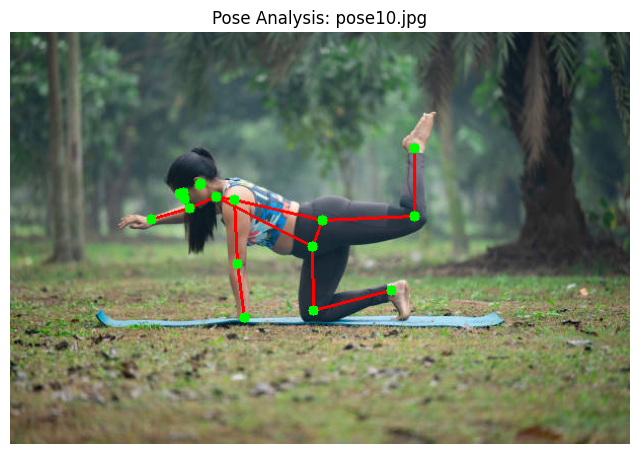


🔹 **POSE FEEDBACK for pose10.jpg** 🔹
➡ Lower your Left Arm slightly for better balance.
➡ Lower your Right Arm slightly for better balance.
➡ Straighten your Left Leg to improve flexibility and posture.
➡ Straighten your Right Leg to improve flexibility and posture.

🔹 **ANGLE DATA** 🔹
📏 Left Arm: 176.7°
📏 Right Arm: 174.9°
📏 Left Leg: 92.1°
📏 Right Leg: 76.4°

--------------------------------------------------



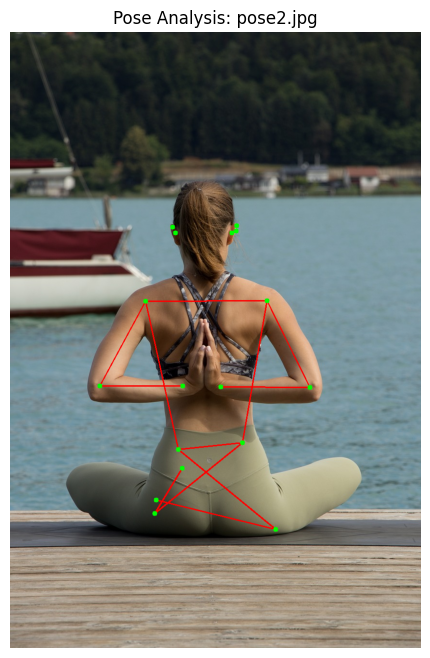


🔹 **POSE FEEDBACK for pose2.jpg** 🔹
➡ Straighten your Left Leg to improve flexibility and posture.
➡ Straighten your Right Leg to improve flexibility and posture.

🔹 **ANGLE DATA** 🔹
📏 Left Arm: 61.8°
📏 Right Arm: 63.2°
📏 Left Leg: 25.8°
📏 Right Leg: 19.9°

--------------------------------------------------



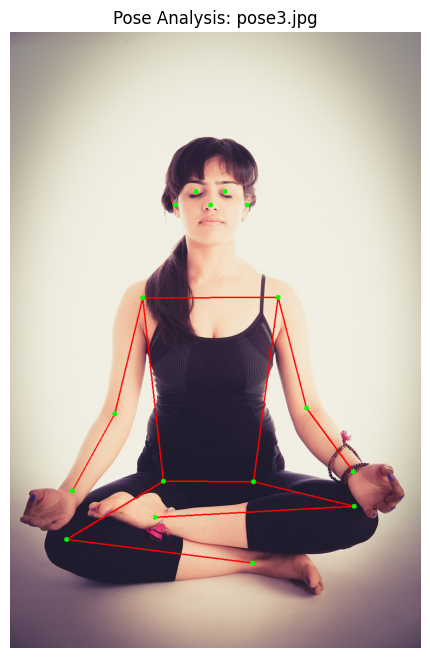


🔹 **POSE FEEDBACK for pose3.jpg** 🔹
➡ Lower your Left Arm slightly for better balance.
➡ Lower your Right Arm slightly for better balance.
➡ Straighten your Left Leg to improve flexibility and posture.


KeyboardInterrupt: 

In [2]:
import cv2
import torch
import numpy as np
import matplotlib.pyplot as plt
import os
import pyttsx3
from torchvision import transforms
from torchvision.models.detection import keypointrcnn_resnet50_fpn

# Initialize text-to-speech engine
engine = pyttsx3.init()

def speak_feedback(text):
    engine.say(text)
    engine.runAndWait()

# Load the pre-trained Keypoint R-CNN model
model = keypointrcnn_resnet50_fpn(pretrained=True)
model.eval()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

COCO_PERSON_SKELETON = [
    (5, 7), (7, 9),    # Left Arm
    (6, 8), (8, 10),   # Right Arm
    (5, 6),            # Shoulders
    (11, 13), (13, 15),# Left Leg
    (12, 14), (14, 16),# Right Leg
    (11, 12),          # Hips
    (5, 11), (6, 12)   # Torso
]

def calculate_angle(a, b, c):
    a, b, c = np.array(a), np.array(b), np.array(c)
    ba, bc = a - b, c - b
    cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
    return np.degrees(np.arccos(np.clip(cosine_angle, -1.0, 1.0)))

def analyze_pose(keypoints):
    feedback_list = []
    angle_data = {}
    
    joints = {
        "Left Arm": (keypoints[5], keypoints[7], keypoints[9]),
        "Right Arm": (keypoints[6], keypoints[8], keypoints[10]),
        "Left Leg": (keypoints[11], keypoints[13], keypoints[15]),
        "Right Leg": (keypoints[12], keypoints[14], keypoints[16])
    }
    
    for limb, (a, b, c) in joints.items():
        angle = calculate_angle(a[:2], b[:2], c[:2])
        angle_data[limb] = angle  

        if limb in ["Left Arm", "Right Arm"]:
            if angle < 45:
                feedback_list.append(f"Raise your {limb} higher to engage your upper body.")
            elif angle > 135:
                feedback_list.append(f"Lower your {limb} slightly for better balance.")

        if limb in ["Left Leg", "Right Leg"]:
            if angle < 140:
                feedback_list.append(f"Straighten your {limb} to improve flexibility and posture.")

    if not feedback_list:
        feedback_list.append("Excellent form! Your pose is well-aligned.")
    
    return feedback_list, angle_data

def load_image(image_path):
    img = cv2.imread(image_path)
    if img is None:
        raise FileNotFoundError(f"Error: Could not load image at {image_path}")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    transform = transforms.Compose([transforms.ToTensor()])
    return img, transform(img).to(device)

image_folder = "images"
image_files = [os.path.join(image_folder, f) for f in os.listdir(image_folder) if f.endswith(('.jpg', '.png', '.jpeg'))]

for image_path in image_files:
    img, img_tensor = load_image(image_path)

    with torch.no_grad():
        output = model([img_tensor])

    keypoints = output[0]['keypoints'][0].cpu().numpy()
    feedback, angles = analyze_pose(keypoints)

    for partA, partB in COCO_PERSON_SKELETON:
        if keypoints[partA][2] > 0.5 and keypoints[partB][2] > 0.5:
            cv2.line(img, tuple(map(int, keypoints[partA][:2])), tuple(map(int, keypoints[partB][:2])), (255, 0, 0), 2)

    for x, y, conf in keypoints:
        if conf > 0.5:
            cv2.circle(img, (int(x), int(y)), 5, (0, 255, 0), -1)

    plt.figure(figsize=(8, 8))
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Pose Analysis: {os.path.basename(image_path)}")
    plt.show()

    print(f"\n🔹 **POSE FEEDBACK for {os.path.basename(image_path)}** 🔹")
    for msg in feedback:
        print(f"➡ {msg}")
        speak_feedback(msg)

    print("\n🔹 **ANGLE DATA** 🔹")
    for limb, angle in angles.items():
        print(f"📏 {limb}: {angle:.1f}°")
    
    print("\n" + "-"*50 + "\n")


Chceking accuracy